
<h1 style="color:green;"> HOUSE PRICE ANALYSIS IN STATISTICS</h1>



<h3 style="color:blue;">This notebook contains an analysis of property prices per square feet in the city of Bangalore. The analysis includes:

1. Basic Exploratory Data Analysis (EDA)
2. Outlier Detection and Removal using various methods
3. Box Plot Analysis to determine the best outlier removal method
4. Histogram and Normality Check with Transformations
5. Correlation Analysis with Heatmap
6. Scatter Plot Analysis to check the correlation between variables </h3>




<h4> Import Libraries and load data</h4>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
file = 'C:\\Users\\bisma\\Downloads\\house_price.csv'
df = pd.read_csv(file)
print(df)


                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0     4  231.00    5   
13196                     other      4 BHK      3600.0     5  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   
13199              Doddathoguru      1 BHK       550.0     1   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

<h3 style="color:brown;"> Q1. Perform Basic EDA</h3>

In [4]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB
None


In [5]:
# Display the first few rows of the dataset
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2               Uttarahalli      3 BHK      1440.0     2   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                  Kothanur      2 BHK      1200.0     2   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [6]:
# Display the last few rows of the dataset
print(df.tail())

                    location       size  total_sqft  bath  price  bhk  \
13195             Whitefield  5 Bedroom      3453.0     4  231.0    5   
13196                  other      4 BHK      3600.0     5  400.0    4   
13197  Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.0    2   
13198        Padmanabhanagar      4 BHK      4689.0     4  488.0    4   
13199           Doddathoguru      1 BHK       550.0     1   17.0    1   

       price_per_sqft  
13195            6689  
13196           11111  
13197            5258  
13198           10407  
13199            3090  


In [7]:
# Display summary statistics
print(df.describe())


         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [8]:
# Check for missing values
print(df.isnull().sum())


location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [9]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

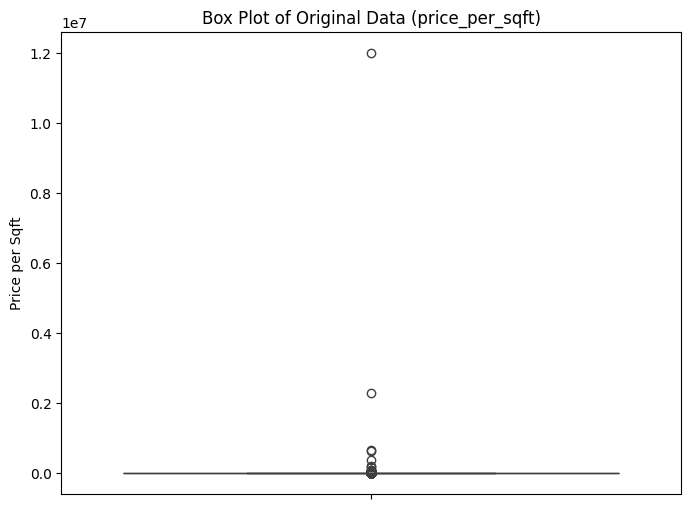

In [10]:
# a box plot for before remove the outliers of data
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price_per_sqft'])
plt.title('Box Plot of Original Data (price_per_sqft)')
plt.ylabel('Price per Sqft')
plt.show()

 create a box plot to visualize the distribution of price_per_sqft and identify the presence of outliers.

In [12]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<h3 style="color:brown;">Q2. Detect and Remove Outliers</h3>


<h4>Outliers can significantly affect the analysis, so we will use different methods to detect and handle them.</h4>



<h4 style="color:gray;">  a) Mean and Standard Deviation</h4>

In [13]:
mean = df['price_per_sqft'].mean()
print(mean)


7920.336742424242


In [14]:
std_dev = df['price_per_sqft'].std()
print(std_dev)


106727.16032810867


In [15]:
# data without outliers. 
newdata_mean_std = df[(df['price_per_sqft'] > (mean - 3 * std_dev)) & (df['price_per_sqft'] < (mean + 3 * std_dev))]
print(newdata_mean_std)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0     4  231.00    5   
13196                     other      4 BHK      3600.0     5  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   
13199              Doddathoguru      1 BHK       550.0     1   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [16]:
mean = newdata_mean_std['price_per_sqft'].mean()
print(mean)


6713.708601743085


<h4>Outliers Detected and Removed Using Mean and Standard Deviation Method
Outliers are detected if they fall outside the 
range of (mean ± 3 * std_dev).
Number of outliers detected: 5
Shape of dataset after removing outliers: 13,195 rows and 7 columns</h4>

<h4 style="color:gray;">b) Percentile Method</h4>

In [17]:
lower_bound = df['price_per_sqft'].quantile(0.05)
print(lower_bound)

3107.8500000000004


In [18]:
upper_bound = df['price_per_sqft'].quantile(0.95)
print(upper_bound)

15312.099999999984


In [19]:
percentile_newdata = df[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]
print(percentile_newdata)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13194         Green Glen Layout      3 BHK      1715.0     3  112.00    3   
13195                Whitefield  5 Bedroom      3453.0     4  231.00    5   
13196                     other      4 BHK      3600.0     5  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   

       price_per_sqft  
0                3699  
1                4615  
2  

<h4>5th Percentile (lower_bound)Values below this threshold are considered as lower outliers.
95th Percentile (upper_bound)Values above this threshold are considered as upper outliers.
The filtered dataset percentile_newdata retains only the values within this range, effectively removing outliers.
11880 rows x 7 columns</h4>

<h4 style="color:gray;"> c) IQR -Interquartile Range Method </h4>


In [20]:
Q1 = df['price_per_sqft'].quantile(0.25)
print("Q1",Q1)
Q3 = df['price_per_sqft'].quantile(0.75)
print("Q3",Q3)
IQR = Q3 - Q1
print("IQR=",IQR)


Q1 4267.0
Q3 7317.0
IQR= 3050.0


In [21]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower bound",lower_bound)
print("upper bound",upper_bound)


lower bound -308.0
upper bound 11892.0


In [22]:
data_iqr = df[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]
print(data_iqr)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0     4  231.00    5   
13196                     other      4 BHK      3600.0     5  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   
13199              Doddathoguru      1 BHK       550.0     1   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

<h4>Outliers are detected if they fall above Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
Q1 = data['price_per_sqft'].quantile(0.25): This calculates the first quartile (25th percentile) of the price_per_sqft column.
Q3 = data['price_per_sqft'].quantile(0.75): This calculates the third quartile (75th percentile) of the price_per_sqft column.
IQR = Q3 - Q1: The IQR is the range between the 25th and 75th percentiles. It measures the spread of the middle 50% of the data.
Filter the Data to Remove Outliers after 11935 rows x 7 columns </h4>


<h4 style="color:gray;"> d) Z-Score Method </h4>


In [5]:
mean_price = df['price_per_sqft'].mean()
std_dev_price = df['price_per_sqft'].std()
df['z_score'] = (df['price_per_sqft'] - mean_price) / std_dev_price

# Filter data to remove outliers based on Z-score method
data_zscore = df[(df['z_score'] > -3) & (df['z_score'] < 3)]
print(data_zscore)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0     2   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0     5  120.00    4   
2                   Uttarahalli      3 BHK      1440.0     2   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0     3   95.00    3   
4                      Kothanur      2 BHK      1200.0     2   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0     4  231.00    5   
13196                     other      4 BHK      3600.0     5  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0     2   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0     4  488.00    4   
13199              Doddathoguru      1 BHK       550.0     1   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.039553  
1      

<h4>After Applying Z-Score Method:
The data is filtered to exclude extreme values (outliers) that are more than 3 standard deviations away from the mean.
This results in a cleaned dataset (data_zscore) that better represents the central tendency of the data without the 
influence of extreme values.Remove Outliers after 13195 rows x 8 columns] </h4>

<h3 style="color:brown;"> Q3.Box Plot Analysis to determine the best outlier removal method
</h3>

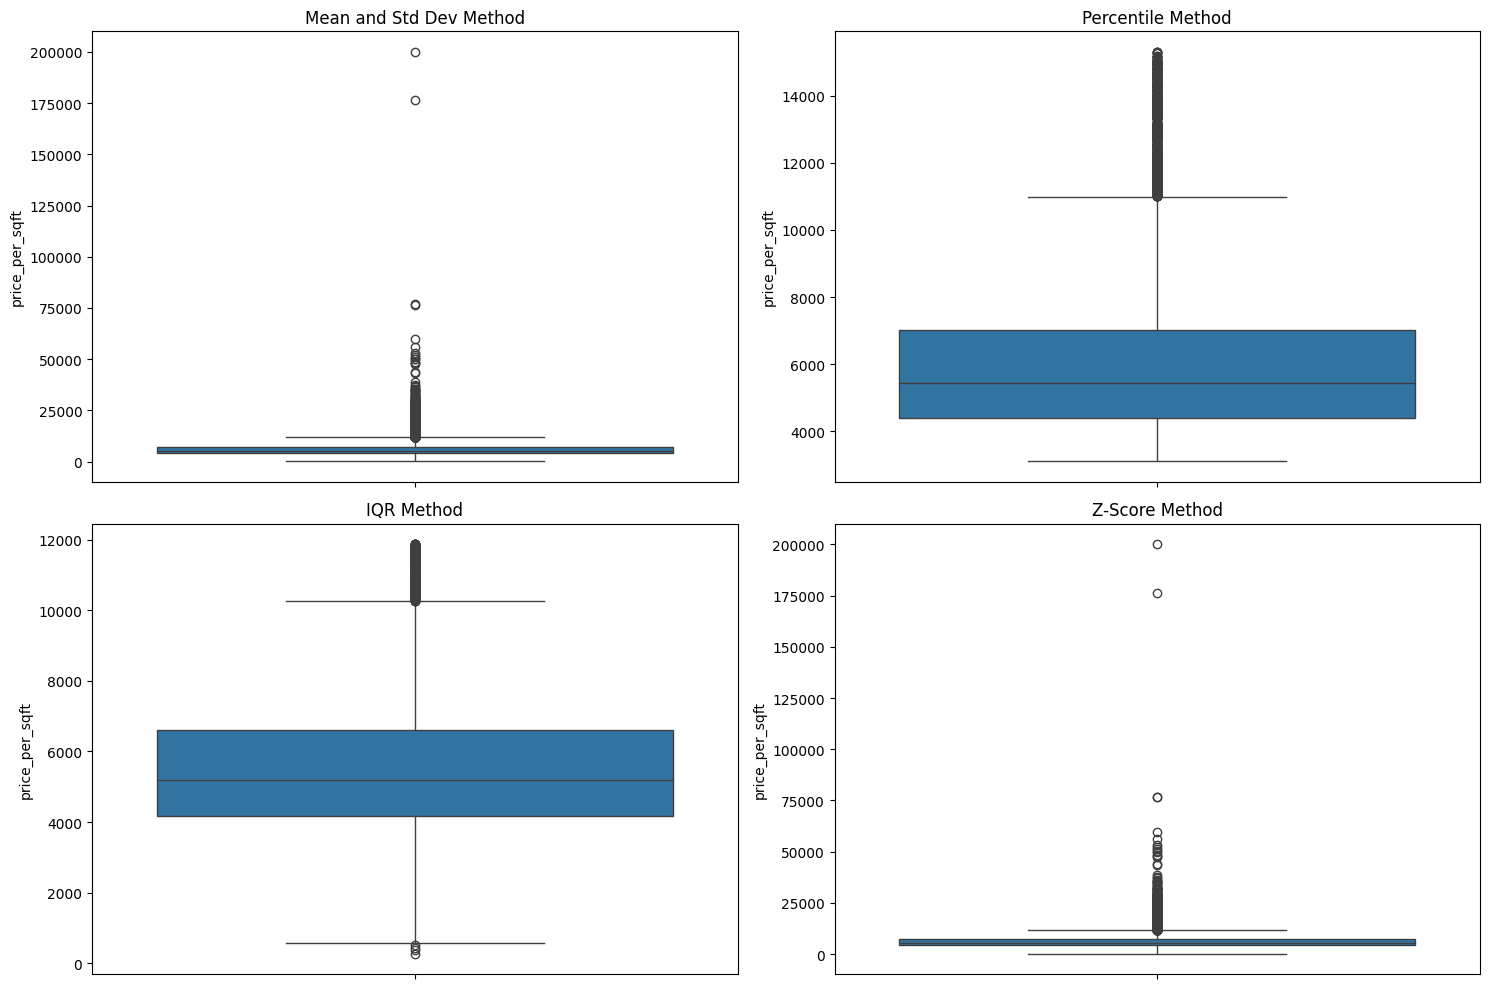

In [24]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Mean and Standard Deviation Method
sns.boxplot(y=newdata_mean_std['price_per_sqft'], ax=axes[0, 0])
axes[0, 0].set_title('Mean and Std Dev Method')

# Percentile Method
sns.boxplot(y=percentile_newdata['price_per_sqft'], ax=axes[0, 1])
axes[0, 1].set_title('Percentile Method')

# IQR Method
sns.boxplot(y=data_iqr['price_per_sqft'], ax=axes[1, 0])
axes[1, 0].set_title('IQR Method')

# Z-Score Method
sns.boxplot(y=data_zscore['price_per_sqft'], ax=axes[1, 1])
axes[1, 1].set_title('Z-Score Method')

plt.tight_layout()
plt.show()

This visuals helps you easily compare how each outlier removal method affects the distribution of price_per_sqft.

<h4>Which Method is Better for Removing Outliers?

Mean and Standard Deviation Method: This method is effective if the data is normally distributed, but it can be sensitive to extreme values.
Percentile Method: This method is more robust to extreme outliers as it trims the extreme 5% from both ends.
IQR Method: This method is robust and works well for skewed data, as it removes values beyond 1.5 times the IQR from the first and third quartiles.
Z-Score Method: Keeps data with z-scores between -3 and 3.other data is removed
                                                
Generally, the IQR Method and Percentile Method are often more robust and preferred for skewed distributions or data with extreme outliers.
consider these data IQR and percentile method is more effective to remove outliers                                             
However, the best method depends on the specific characteristics and requirements of your dataset.</h4>

<h3 style="color:brown;">Q4: Draw Histplot to Check Normality of Price per Square Foot Column
</h3>


In [51]:
from scipy.stats import skew, kurtosis

skewness = skew(df['price_per_sqft'])
kurtosis = kurtosis(df['price_per_sqft'])
print("Original Skewness",skewness)
print("Original Kurtosis",kurtosis)


Original Skewness 108.26875024325159
Original Kurtosis 12090.633538860382


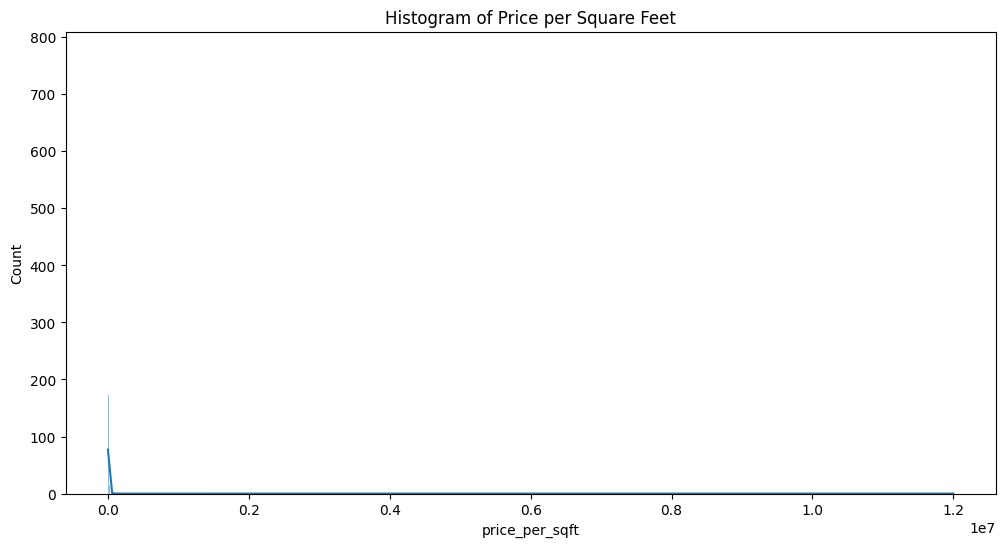

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(df.price_per_sqft,kde=True) 
plt.title('Histogram of Price per Square Feet')
plt.show()


In [53]:
# log transformation
df['price_per_sqft_log'] = np.log(df['price_per_sqft']) 
df['price_per_sqft_log']

0        8.215818
1        8.437067
2        8.367532
3        8.739536
4        8.354674
           ...   
13195    8.808220
13196    9.315691
13197    8.567506
13198    9.250234
13199    8.035926
Name: price_per_sqft_log, Length: 13200, dtype: float64

In [64]:
# skewness and kurtosis after transformation
transformed_skew = skew(df['price_per_sqft_log'])
transformed_kurt = kurtosis(df['price_per_sqft_log'])
print("Transformed Skewness:",transformed_skew)
print("Transformed Kurtosis:",transformed_kurt)

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


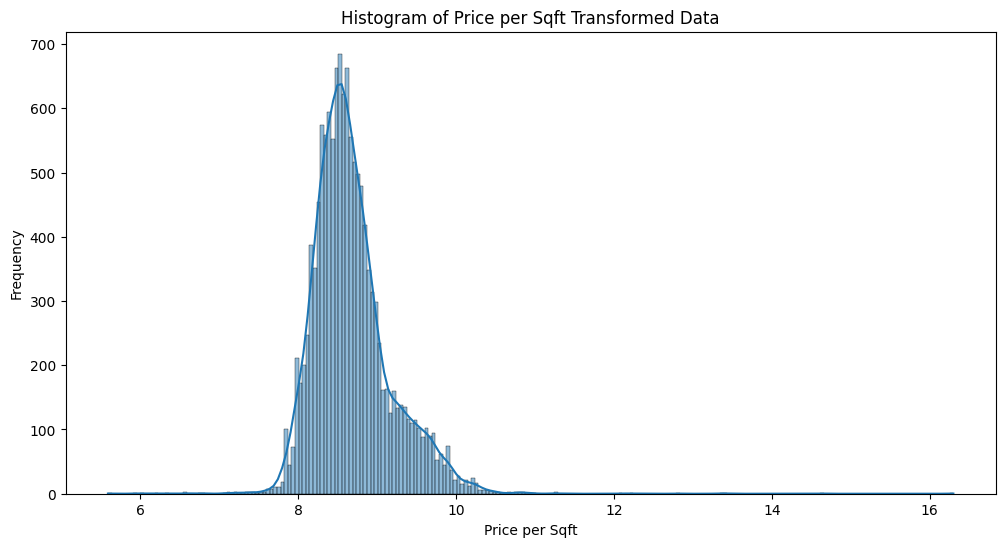

In [72]:
# Plot histogram after transformation
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('Histogram of Price per Sqft Transformed Data')
plt.xlabel('Price per Sqft') 
plt.ylabel('Frequency')
plt.show()


<h4>Original Skewness: 108.26875024325159 (indicating a highly right-skewed distribution)
Original Kurtosis: 12090.633538860382 (indicating extremely heavy tails)
The histogram shows that the data is extremely right-skewed, with a long tail on the right side, which aligns with our skewness and kurtosis values.
Through this analysis, we observed that the original price_per_sqft data was highly skewed with extremely heavy tails, as indicated by
the very high skewness and kurtosis values. Applying a log transformation significantly improved the distribution, resulting in 
skewness and kurtosis values closer to those of a normal distribution.
Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957
With a transformed skewness of approximately 1.4003 and a transformed kurtosis of around 9.2030, you likely have a
distribution that is positively skewed (since the skewness is positive) 
and leptokurtic (since the kurtosis is greater than 3, indicating heavier tails than a normal distribution).</h4>

<h3 style="color:brown;">Q5:Check Correlation Between Numerical Columns and Plot Heatmap</h3>


In [10]:
# Compute correlation matrix
df1=df.drop(["location","size","z_score"],axis=1)
print(df1)
corr_matrix  = df1.corr()



       total_sqft  bath   price  bhk  price_per_sqft
0          1056.0     2   39.07    2            3699
1          2600.0     5  120.00    4            4615
2          1440.0     2   62.00    3            4305
3          1521.0     3   95.00    3            6245
4          1200.0     2   51.00    2            4250
...           ...   ...     ...  ...             ...
13195      3453.0     4  231.00    5            6689
13196      3600.0     5  400.00    4           11111
13197      1141.0     2   60.00    2            5258
13198      4689.0     4  488.00    4           10407
13199       550.0     1   17.00    1            3090

[13200 rows x 5 columns]


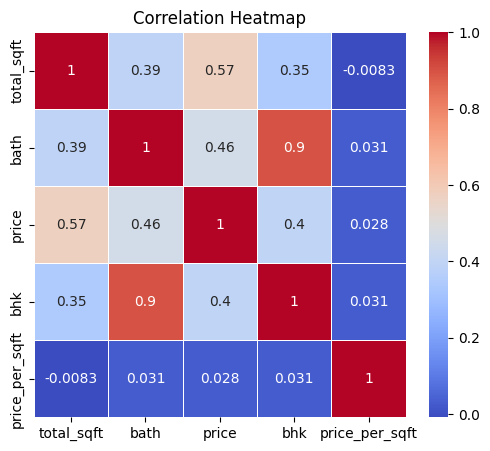

In [16]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<h4>This heatmap provides a clear visual representation of how the variables in dataset relate to one another,
which can be useful for identifying potential predictors for property price or other dependent variables in analysis.
The correlation coefficient ranges from -1 to 1.
1 indicates a perfect positive linear relationship.
-1 indicates a perfect negative linear relationship.
0 indicates no linear relationship.
High Correlation:
There is a strong positive correlation 
between bath and bhk (0.9).There is a moderate positive correlation between total_sqft and price (0.57),
Weak Correlation:
price_per_sqft has very weak correlations with all other variables, indicating that the price per square foot is
relatively independent of the other variables indataset.</h4>

<h3 style="color:brown;">Q6: Draw Scatter Plot Between Variables to Check Correlation
</h3>


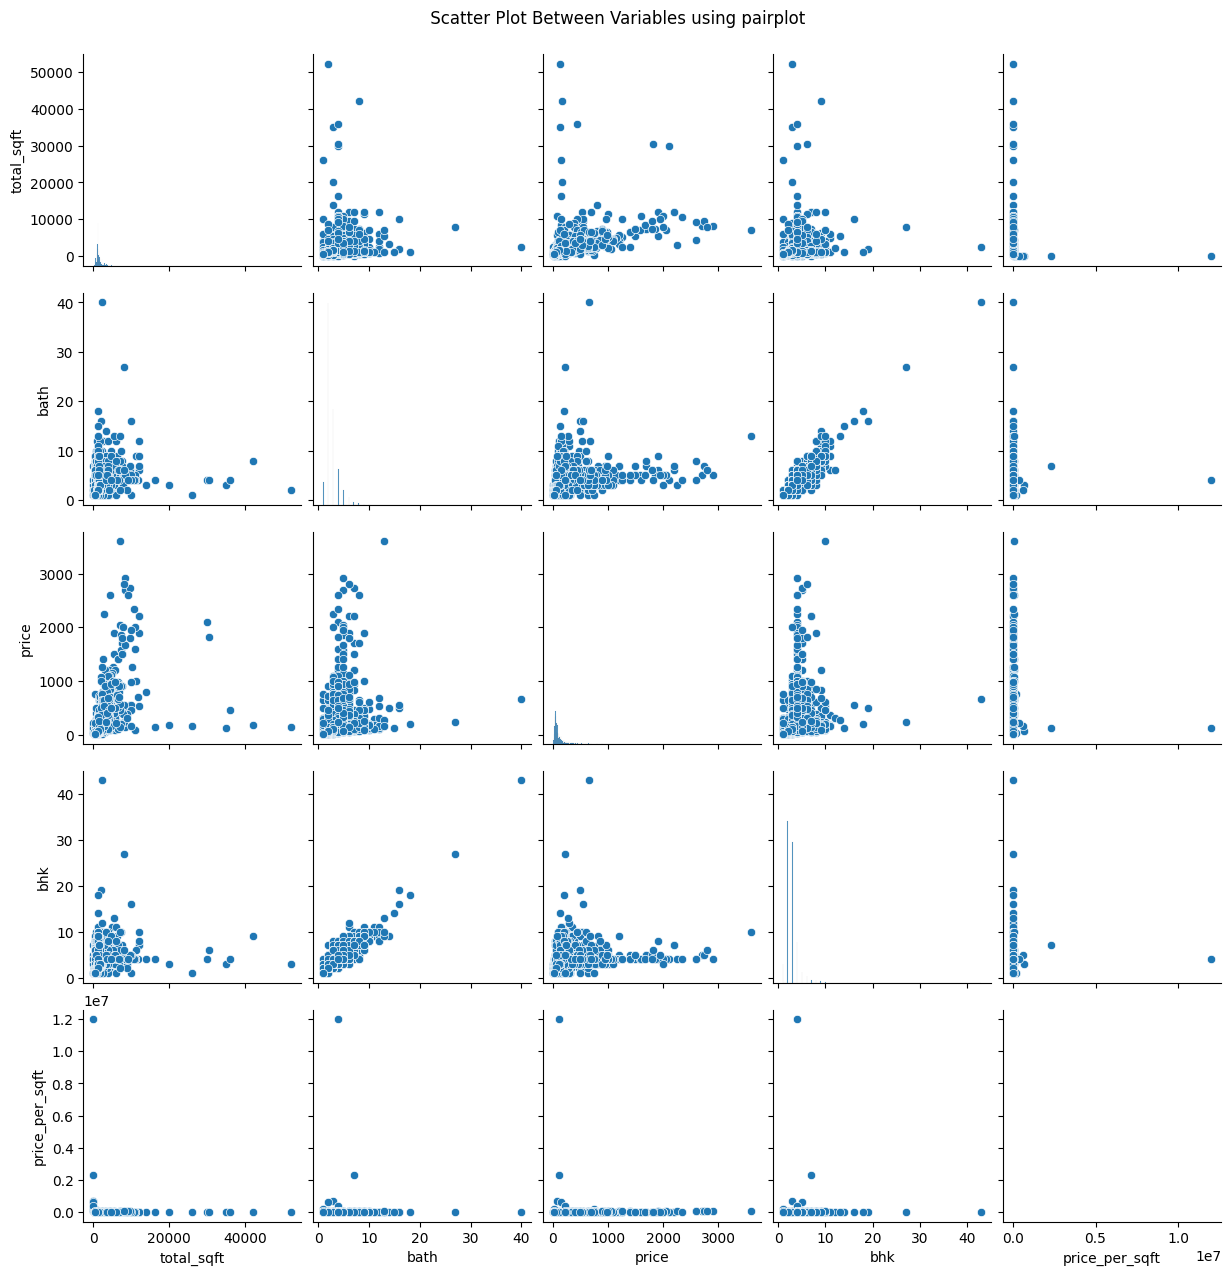

In [25]:
df1 = df.drop(["location", "size", "z_score"], axis=1)
sns.pairplot(df1)
plt.suptitle(' Scatter Plot Between Variables using pairplot') 
plt.show()


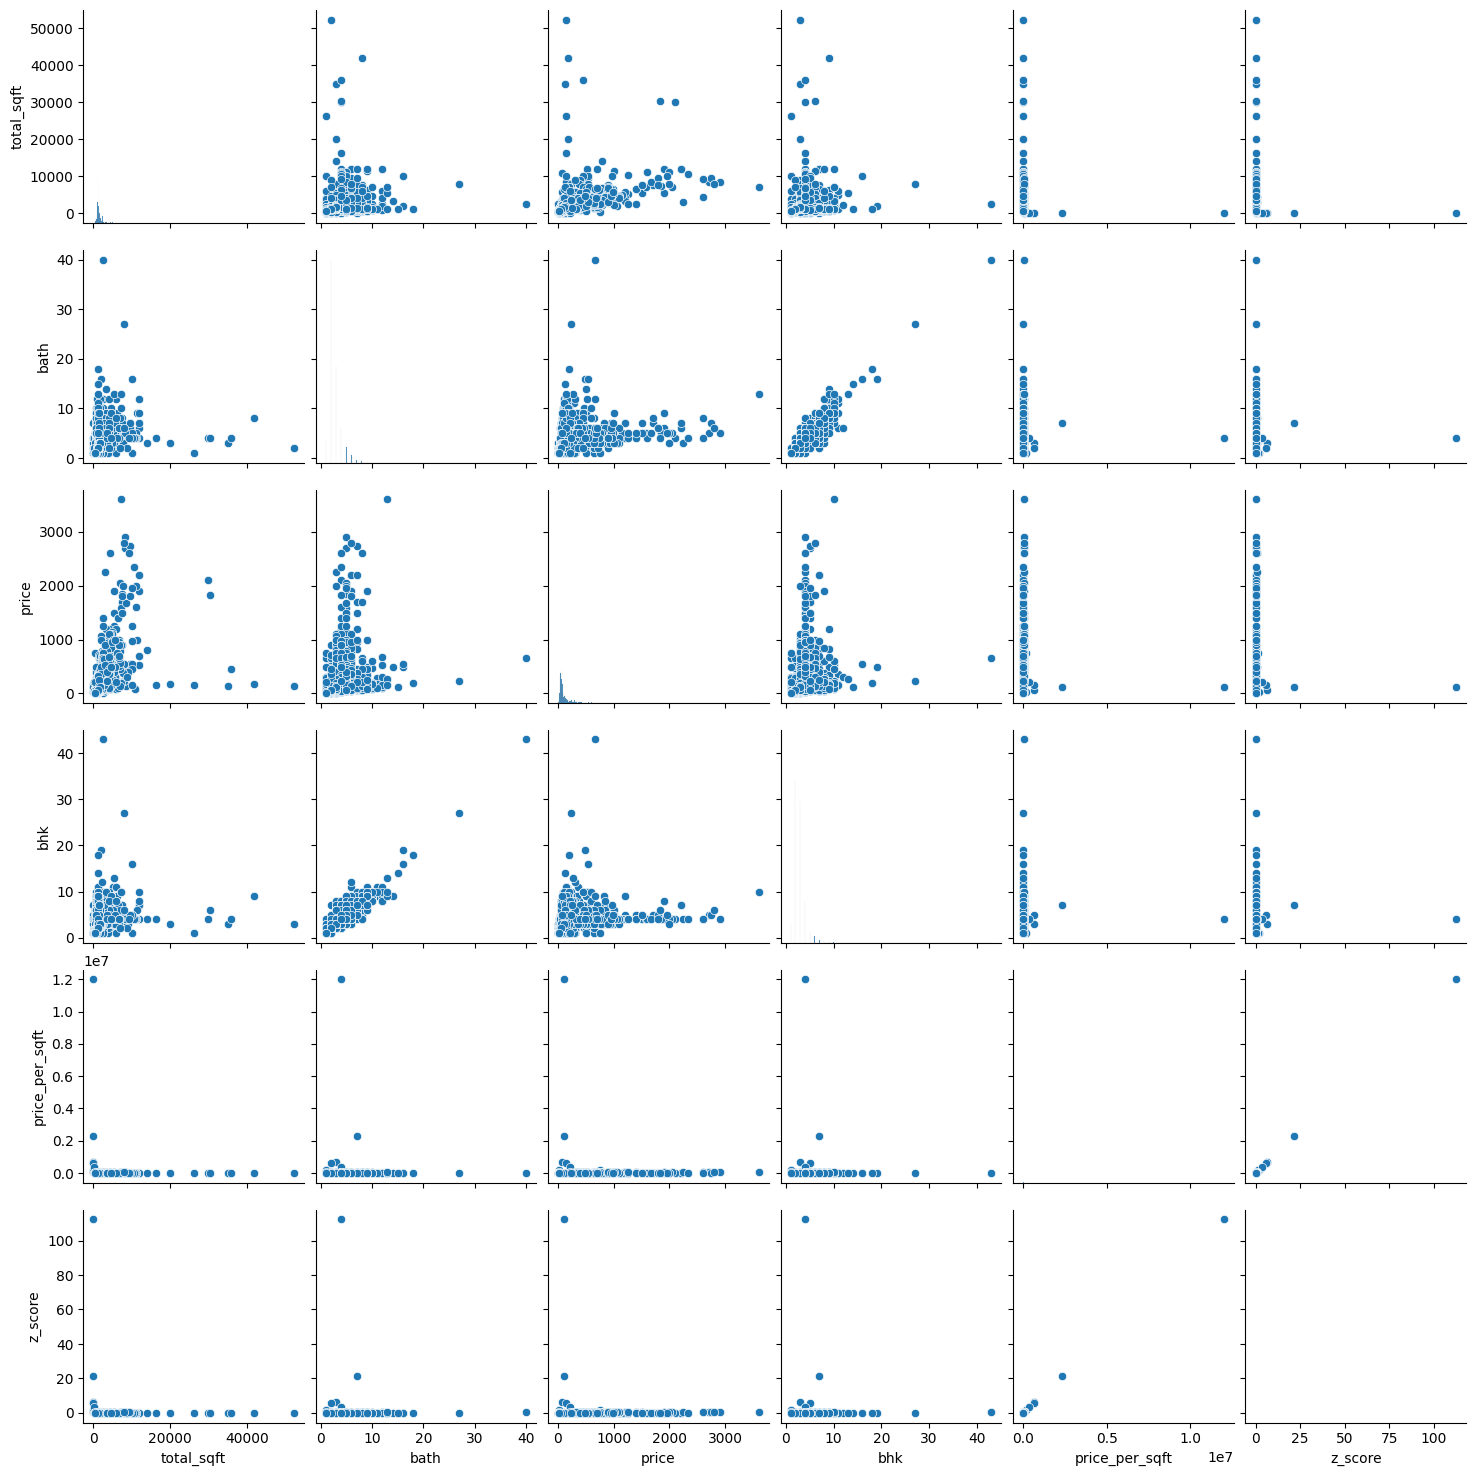

In [26]:
sns.pairplot(df)

<h4>The scatter plot matrix provides a comprehensive visual representation of the relationships between various property features.
Key takeaways include the strong association between property size, number of bedrooms, and price, while the price per square
foot remains largely independent of these features. 
These insights can help in understanding property valuations and the factors that contribute to the pricing of real estate.

The scatter plot shows a positive correlation between total_sqft and price. 
Larger properties tend to be more expensive. This is expected as larger properties offer more living space and typically command higher prices.
The scatter plot between price and the number of bedrooms shows a positive correlation
The scatter plot indicates a strong positive correlation between the number of bathrooms and the number of bedrooms.
There is a moderate positive correlation between total square footage and the number of bedrooms.
shows a weak correlation with other variables like total_sqft, bath, price, and bhk. 
This suggests that the price per square foot is relatively independent of the property's size, number of bedrooms, or bathrooms.</h4> 
